In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read SOC excel files

soc2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2018.xlsx", header=7)
soc2018_changes = pd.read_excel("//Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_type_of_change_by_detail_occup.xlsx", header=8)
soc2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2010.xls", header=11)
soc2018_dm=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_direct_match_title_file.xlsx",header=7)

In [4]:
# Labelling columns and cleaning up


soc2018 = soc2018.rename(columns = {'Unnamed: 4':'Occupation'})
soc2018_dm=soc2018_dm.drop(columns={'Illustrative Example'})

In [5]:
# soc2018_dm['2018 SOC Direct Match Title']=soc2018_dm['2018 SOC Direct Match Title'].str.lower()

In [6]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [7]:
# deleted_soc=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2010_codes_deleted_in_2018.xlsx",header=7)
# deleted_soc['2010 SOC Title']=deleted_soc['2010 SOC Title'].str.lower()

In [8]:
# Reading in all the datasets from 2011-2021

df2021=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2021.xlsx",header=5)
df2020=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2020.xlsx",header=5)
df2019=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2019.xlsx",header=5)
df2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2018.xlsx",header=5)
df2017=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2017.xlsx",header=5)
df2016=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2016.xlsx",header=5)
df2015=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2015.xlsx",header=5)
df2014=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2014.xlsx",header=5)
df2013=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2013.xlsx",header=5)
df2012=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2012.xlsx",header=5)
df2011=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2011.xlsx",header=5)

In [9]:
# Add in the years and rename the columns

df2021['Unnamed: 10'] = 2021
df2020['Unnamed: 10'] = 2020
df2019['Unnamed: 10'] = 2019
df2018['Unnamed: 10'] = 2018
df2017['Unnamed: 10'] = 2017
df2016['Unnamed: 10'] = 2016
df2015['Unnamed: 10'] = 2015
df2014['Unnamed: 10'] = 2014
df2013['Unnamed: 10'] = 2013
df2012['Unnamed: 10'] = 2012
df2011['Unnamed: 10'] = 2011


df=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

df = df.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})


In [10]:
# Drop redundant rows, eg. blank rows
df.reset_index(drop=True, inplace=True)     # Reset index to ensure the correct rows are dropped
df=df.drop(index=df.groupby('Year').head(2).index)
df=df.drop(index=df.groupby('Year').tail(2).index)
df=df[df['Occupation'].notnull()]
df.reset_index(drop=True, inplace=True)

In [11]:
# Standardize all occupations to lowercase and remove double spaces

df['Occupation'] = df['Occupation'].str.lower()
df['Occupation']=df['Occupation'].str.replace(r'\s+', ' ', regex=True)

# Replace en dashes with hyphens

df['Median age']=df['Median age'].replace('–','-')


In [12]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [13]:
soc2018.loc[soc2018['Major Group'].notnull(),['Minor Group','Broad Group','Detailed Occupation']]='-'

In [14]:
soc2018['Major Group'].ffill(axis=0, inplace=True)

In [15]:
soc2018.loc[soc2018['Minor Group'].notnull(),['Broad Group','Detailed Occupation']]='-'

In [16]:
soc2018['Minor Group'].ffill(axis=0, inplace=True)

In [17]:
soc2018.loc[soc2018['Broad Group'].notnull(),['Detailed Occupation']]='-'

In [18]:
soc2018['Broad Group'].ffill(axis=0, inplace=True)

In [19]:
# soc2018

2011-2019 have the same number of occupations (and presumably the same list of occupations): 572. Meanwhile 2020-2021 have 602 rows.

In [101]:
joint_deleted = pd.merge(left = df[df['Year']!=2021|2020], 
         right = deleted_soc,
        how= 'inner',
        left_on='Occupation',
        right_on='2010 SOC Title',
        indicator=True)

In [107]:
# joint_deleted

In [23]:
joint = pd.merge(left = df[df['Year']==2021], 
         right = df[df['Year']==2018],
        how= 'outer',
        left_on='Occupation',
        right_on='Occupation',
        indicator=True)

Import Changes.xlsx

In [20]:
changes2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=0)
changes2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=1)


In [21]:
# Remove unwanted columns

changes2010.drop(changes2010.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)
changes2018.drop(changes2018.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)

# Lower case all strings
changes2010['Occupation']=changes2010['Occupation'].str.lower()
changes2010['Action']=changes2010['Action'].str.lower()
changes2010['Map to']=changes2010['Map to'].str.lower()

changes2018['Occupation']=changes2018['Occupation'].str.lower()
changes2018['Action']=changes2018['Action'].str.lower()
changes2018['Map to']=changes2018['Map to'].str.lower()

In [22]:
# Remove all rows with 'Action' == '-' since no action needs to be taken

changes2018.drop(index=changes2018[changes2018['Action']=='-'].index,inplace=True)
changes2010.drop(index=changes2010[changes2010['Action']=='-'].index,inplace=True)

Carry out the 'change' action, i.e. renaming occupations

In [23]:
df_test=df[df['Year']>2019].copy()      # Rows with year >2019
test=changes2018.copy()

df_test2=df[df['Year']<2020].copy()     # Rows with year <2020
test2=changes2010.copy()

In [24]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')


joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename
joint_test.drop(joint_test.columns[[-1,-2]],axis=1,inplace=True)        # Drop unnecessary columns



# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2]],axis=1,inplace=True)      # Drop unnecessary columns

In [25]:
# Update df

df_test=joint_test
df_test2=joint_test2


In [26]:
# Remove 'change' action rows

test.drop(test[test['Action']=='change'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='change'].index,axis=0,inplace=True)

In [27]:
# # <2020
# joint_test2 = pd.merge(left = df_test2, 
#          right = test2[test2['Action']=='change'],
#         how= 'left',
#         left_on='Occupation',
#         right_on='Occupation')

# joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
# joint_test2[joint_test2['Action']=='combine']

In [28]:
df_test2

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year
0,"management, professional, and related occupations",64218.0,428.0,3402.0,15126.0,15133.0,14103.0,11360.0,4665.0,43.8,2019
1,"management, business, and financial operations...",26981.0,82.0,969.0,5529.0,6330.0,6469.0,5394.0,2208.0,45.9,2019
2,management occupations,18985.0,62.0,536.0,3452.0,4524.0,4731.0,4024.0,1655.0,47,2019
3,chief executives,1602.0,2.0,5.0,121.0,329.0,461.0,465.0,219.0,52.7,2019
4,general and operations managers,1058.0,0.0,19.0,258.0,282.0,257.0,196.0,46.0,44.2,2019
...,...,...,...,...,...,...,...,...,...,...,...
5071,pumping station operators,21.0,0.0,3.0,6.0,4.0,3.0,5.0,0.0,-,2011
5072,refuse and recyclable material collectors,92.0,2.0,12.0,22.0,16.0,24.0,12.0,4.0,41.3,2011
5073,mine shuttle car operators,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-,2011
5074,"tank car, truck, and ship loaders",3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-,2011


Carry out 'delete' action

In [29]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test.drop(index=joint_test[joint_test['Action']=='delete'].index,axis=0,inplace=True)


# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test2.drop(index=joint_test2[joint_test2['Action']=='delete'].index,axis=0,inplace=True)

In [30]:
# Remove 'delete' action rows

test.drop(test[test['Action']=='delete'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='delete'].index,axis=0,inplace=True)

Carry out 'combine' and 'combine but keep' actions

In [31]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep=joint_test.loc[joint_test['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum=joint_test.loc[joint_test['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x=pd.merge(left=joint_test.loc[joint_test['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x=x[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x['Median age']='-'     # Combined rows have no valid 'Median age'

y=pd.merge(left=joint_test, right=joint_sum[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z=pd.concat([y[y['_merge']!='both'],x]).drop(columns='_merge')          # Concat x and y
z=pd.concat([z,keep])           # Concat x and y with 'combined but keep' rows

# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep2=joint_test2.loc[joint_test2['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum2=joint_test2.loc[joint_test2['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test2.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x2=pd.merge(left=joint_test2.loc[joint_test2['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum2,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x2=x2[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x2['Median age']='-'     # Combined rows have no valid 'Median age'

y2=pd.merge(left=joint_test2, right=joint_sum2[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z2=pd.concat([y2[y2['_merge']!='both'],x2]).drop(columns='_merge')          # Concat x and y
z2=pd.concat([z2,keep2])           # Concat x and y with 'combined but keep' rows


Map to 2018 SOC

In [32]:
# z2[(z2['Year']==2018)&(z2['Occupation']=='miscellaneous healthcare diagnosing or treating practitioners')]

In [33]:
# z2[(z2['Year']==2018)&(z2['Occupation']=='dental hygienists')]

In [34]:
# joint_soc=pd.merge(right=soc2018,left=z,how='outer',left_on='Occupation',right_on='Occupation',indicator=True)

In [35]:
# joint_soc.drop(columns=['Action','Map to'],inplace=True)

In [36]:
# joint_soc[joint_soc['_merge']=='left_only']

In [37]:
joint_soc2=pd.merge(right=soc2018,left=z2,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

In [38]:
df_processed = pd.concat([z,z2])

In [39]:
joint_processed=pd.merge(left=df_processed,right=soc2018,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

Plots

In [85]:
# Detailed Occupation

detailed=joint_processed[joint_processed['Detailed Occupation']!='-']
detailed_sum=detailed.groupby(['Year']).sum()
detailed_sum_arr=detailed_sum['Total'].to_numpy()

total=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

total = total.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})

# Employed  civilian labour force
total_employed_arr=total.loc[total['Occupation']=='Total employed',['Total']].to_numpy()
total_employed_arr=np.flip(total_employed_arr)

# Total civilian labour force
total_arr=np.array([[153617,154975,155389,155922,157130,159187,160320,162075,163539,160742,161204]]).reshape((11,1))


detailed_sum_arr=detailed_sum_arr.reshape(-1,1)

year=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

# plt.bar(year,(detailed_sum_arr/total_arr).reshape(11,))     # Proportion of Detailed occupations wrt total employed
# print((detailed_sum_arr/total_arr))

Text(0, 0.5, 'Ratio')

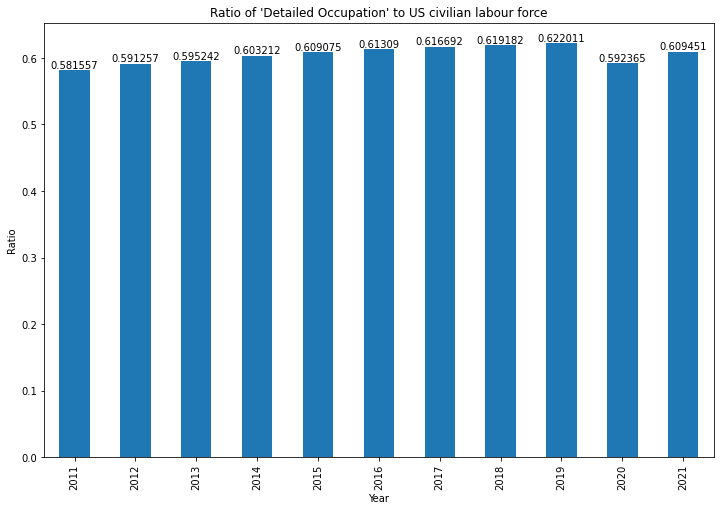

In [86]:
# Ratio of 'Detailed Occupation' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

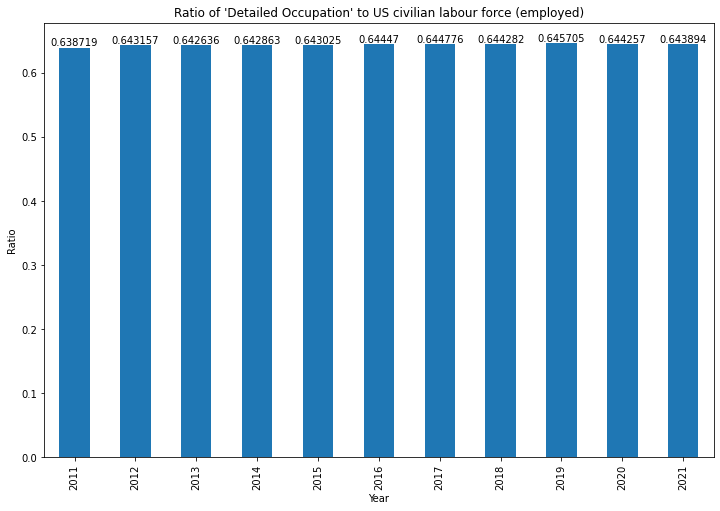

In [87]:
# Ratio of 'Detailed Occupation' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [88]:
# Major Group

major=joint_processed[(joint_processed['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
major_sum=major.groupby(['Year']).sum()
major_sum_arr=major_sum['Total'].to_numpy()

major_sum_arr=major_sum_arr.reshape(-1,1)

# plt.bar(year,(major_sum_arr/total_arr).reshape(11,))     # Proportion of Major Group occupations wrt total employed
# print((major_sum_arr/total_arr))

Text(0, 0.5, 'Ratio')

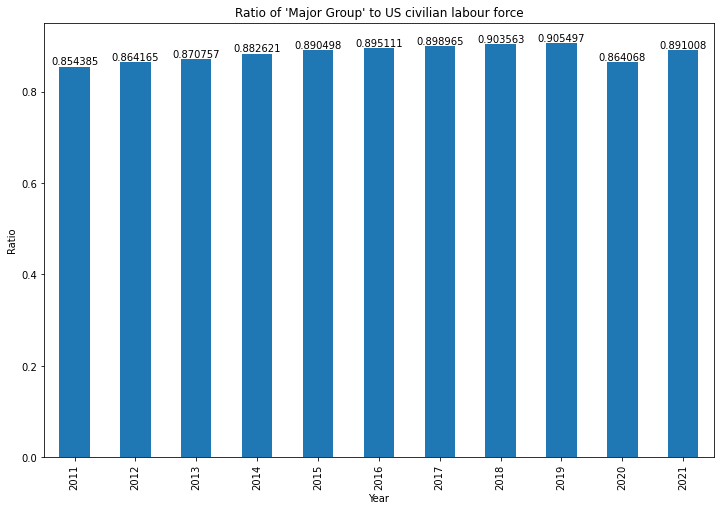

In [91]:
# Ratio of 'Major Group' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

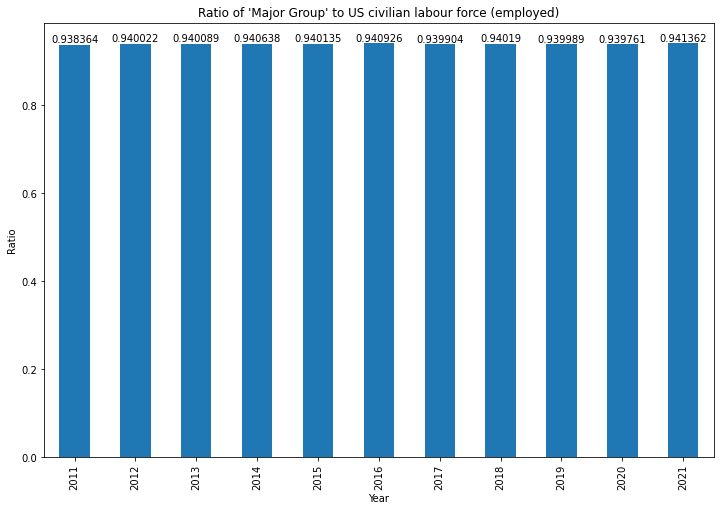

In [92]:
# Ratio of 'Major Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

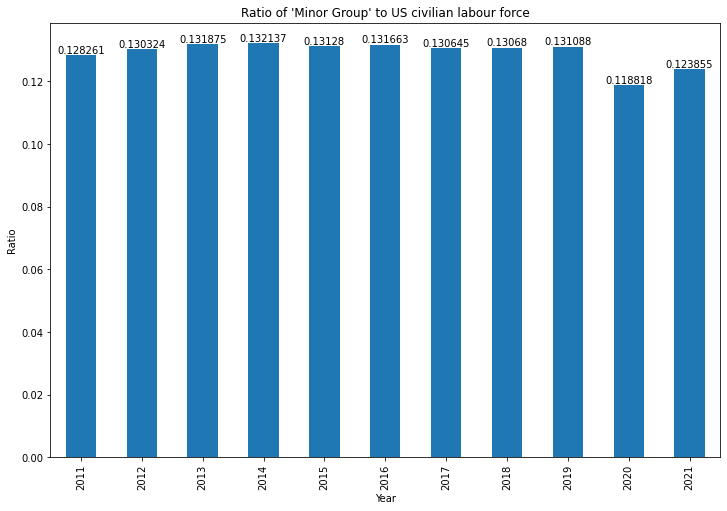

In [93]:
# Ratio of 'Minor Group' to US civilian labour force

minor=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
minor_sum=minor.groupby(['Year']).sum()
minor_sum_arr=minor_sum['Total'].to_numpy()

minor_sum_arr=minor_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

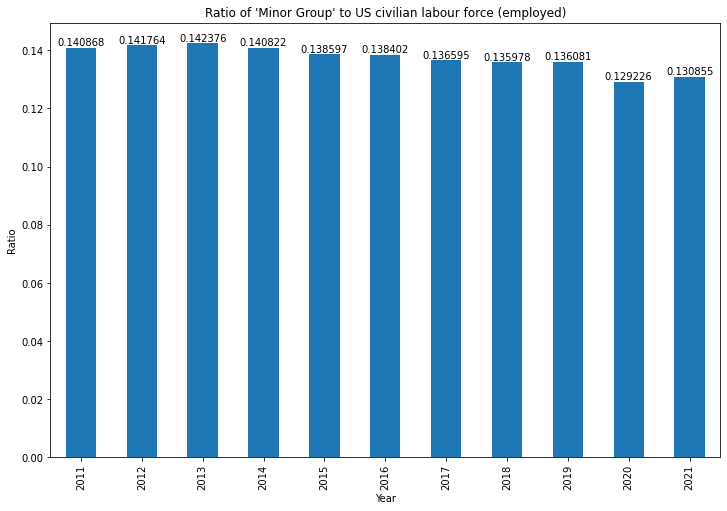

In [95]:
# Ratio of 'Minor Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

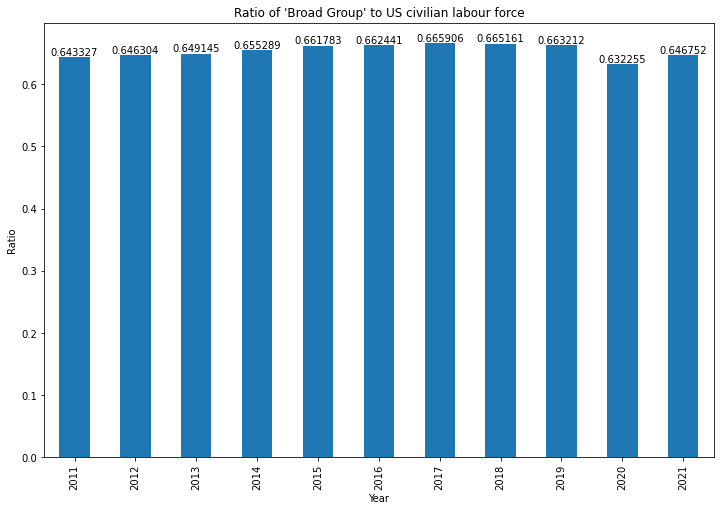

In [98]:
# Ratio of 'Broad Group' to US civilian labour force

broad=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']!='-')&(joint_processed['Detailed Occupation']=='-')]
broad_sum=broad.groupby(['Year']).sum()
broad_sum_arr=broad_sum['Total'].to_numpy()

broad_sum_arr=broad_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

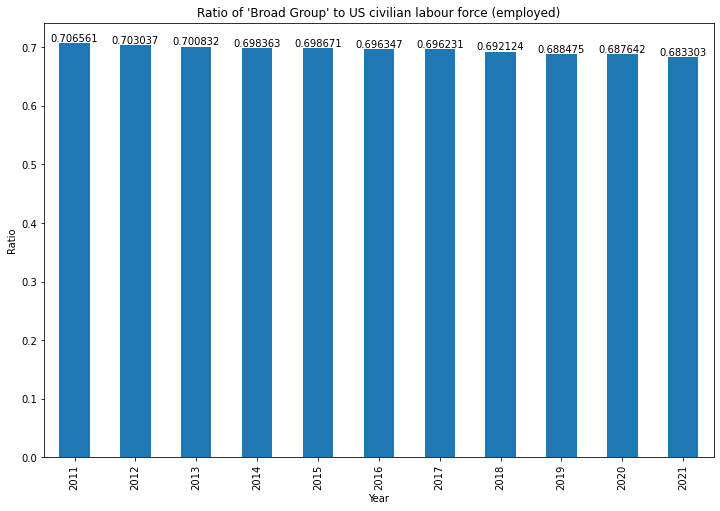

In [97]:
# Ratio of 'Broad Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [768]:
young=joint_processed.iloc[:,2:7].sum(axis=1)
old=joint_processed['65<=']

ratio=old/young
ratio=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],ratio],axis=1)
ratio=ratio.rename(columns={0:'Ratio'})
ratio_major = ratio[(ratio['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

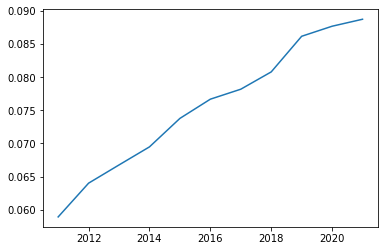

In [775]:
ratio_major_mean=ratio_major.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_major_mean)      # Change in ratio over Major Groups over the years

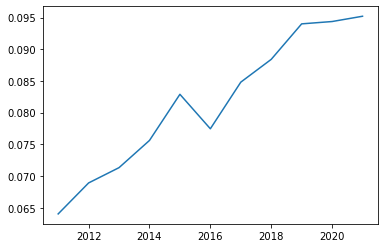

In [774]:
ratio_detailed=ratio[ratio['Detailed Occupation']!='-']
ratio_detailed_mean=ratio_detailed.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_detailed_mean)      # Change in ratio over Detailed Occupations over the years


In [776]:
# ratio[ratio['Ratio']==np.inf]

Text(0.5, 1.0, 'Percentage change of ratio from 2011 to 2021 among Major Groups')

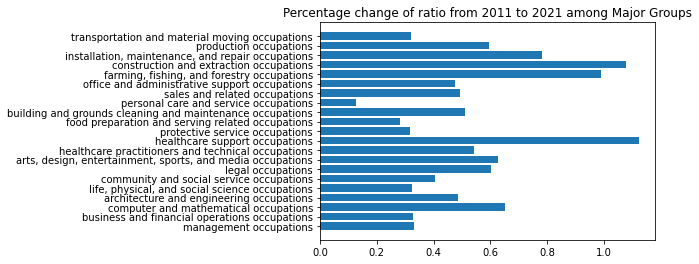

In [806]:
ratio_two_years=ratio_major[(ratio_major['Year']==2021)|(ratio_major['Year']==2011)]
ratio_2011=ratio_two_years.loc[ratio_two_years['Year']==2011,'Ratio'].to_numpy()
ratio_2021=ratio_two_years.loc[ratio_two_years['Year']==2021,'Ratio'].to_numpy()

plt.barh(ratio_two_years.drop_duplicates('Occupation')['Occupation'],(ratio_2021-ratio_2011)/ratio_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups

In [12]:
df

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year
0,"management, professional, and related occupations",64744.0,420.0,3267.0,15222.0,15625.0,14238.0,11394.0,4579.0,43.8,2021
1,"management, business, and financial operations...",27864.0,100.0,1052.0,5726.0,6783.0,6603.0,5411.0,2189.0,45.5,2021
2,management occupations,18986.0,74.0,573.0,3413.0,4728.0,4704.0,3863.0,1630.0,46.5,2021
3,chief executives,1664.0,1.0,4.0,157.0,388.0,446.0,464.0,204.0,51.6,2021
4,general and operations managers,1085.0,2.0,30.0,258.0,303.0,272.0,173.0,47.0,43.4,2021
...,...,...,...,...,...,...,...,...,...,...,...
6259,pumping station operators,21.0,0.0,3.0,6.0,4.0,3.0,5.0,0.0,-,2011
6260,refuse and recyclable material collectors,92.0,2.0,12.0,22.0,16.0,24.0,12.0,4.0,41.3,2011
6261,mine shuttle car operators,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-,2011
6262,"tank car, truck, and ship loaders",3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-,2011


In [78]:
total_arr

array([[153617],
       [154975],
       [155389],
       [155922],
       [157130],
       [159187],
       [160320],
       [162075],
       [163539],
       [160742],
       [161204]])

In [76]:
total_arr=np.array([[153617,154975,155389,155922,157130,159187,160320,162075,163539,160742,161204]]).reshape((11,1))